Name: Jan Floyd J. Vallota
Exercise 6

In [37]:
import sys
print(sys.executable)

c:\Users\ASUS\anaconda3\python.exe


In [38]:
# Lib imports
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [39]:
# DATASET DIRECTORY CONFIGURATION (Muffin vs Chihuahua)
train_dir = r"C:\Users\ASUS\Desktop\ANNExercices\25-26\CS 3A\JANFLOYD_VALLOTA\VALLOTA-JANFLOYD_EXERCISE6\train"
test_dir = r"C:\Users\ASUS\Desktop\ANNExercices\25-26\CS 3A\JANFLOYD_VALLOTA\VALLOTA-JANFLOYD_EXERCISE6\test"

In [40]:
# IMAGE PARAMETERS
# VGG16 works best at 224x224 input
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [41]:
# DATA PREPROCESSING & AUGMENTATION
# Use VGG16 preprocess_input to match ImageNet normalization; no rescale here.
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 3788 images belonging to 2 classes.
Found 945 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


In [42]:
# TRANSFER LEARNING WITH VGG16 (frozen base)
initial_learning_rate = 0.0005

base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)
base_model.trainable = False

inputs = layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs, outputs)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=8000,
    decay_rate=0.9,
    staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


In [43]:
# Configure the model optimizers, loss function, and metrics
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # old
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
# TRAINING THE CNN
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.9227 - loss: 0.4606 - val_accuracy: 0.9873 - val_loss: 0.0689
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.9704 - loss: 0.1673 - val_accuracy: 0.9767 - val_loss: 0.1180
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - accuracy: 0.9757 - loss: 0.1173 - val_accuracy: 0.9873 - val_loss: 0.0564
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.9773 - loss: 0.0862 - val_accuracy: 0.9894 - val_loss: 0.0536
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 353s 3s/step - accuracy: 0.9850 - loss: 0.0610 - val_accuracy: 0.9862 - val_loss: 0.0771
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 329s 3s/step - accuracy: 0.9839 - loss: 0.0729 - val_accuracy: 0.9894 - val_loss: 0.0664
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.9857 - loss: 0.0566 - val_accuracy: 0.9873 - val_loss: 0.0506
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.9863 - loss: 0.0642 - val_accu

In [45]:
# EVALUATE THE MODEL
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9873 - loss: 0.0366
Test Accuracy: 0.9873310923576355


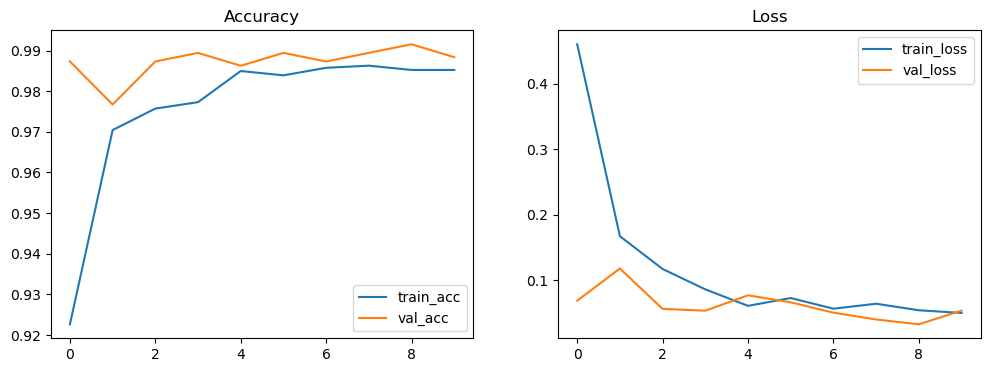

In [46]:
# TRAINING CURVES
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()



In [47]:
# SAVE THE MODEL
MODEL_PATH = 'exercise_6_vgg16_Vallota.h5'
model.save(MODEL_PATH)
print(f"Saved improved model to {MODEL_PATH}")

Saved improved model to exercise_6_vgg16_Vallota.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step


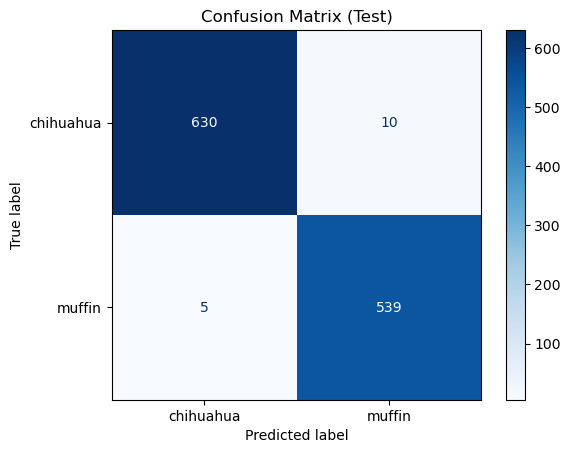

In [48]:
# CONFUSION MATRIX ON TEST SET
import numpy as np

test_preds = model.predict(test_generator)
y_true = test_generator.classes
y_pred = (test_preds.ravel() >= 0.5).astype(int)
class_labels = list(test_generator.class_indices.keys())
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Test)")
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


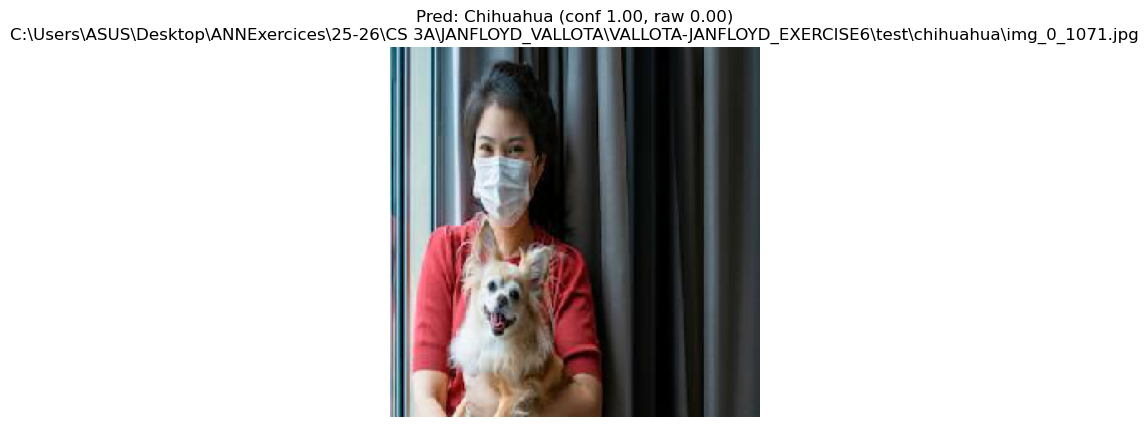

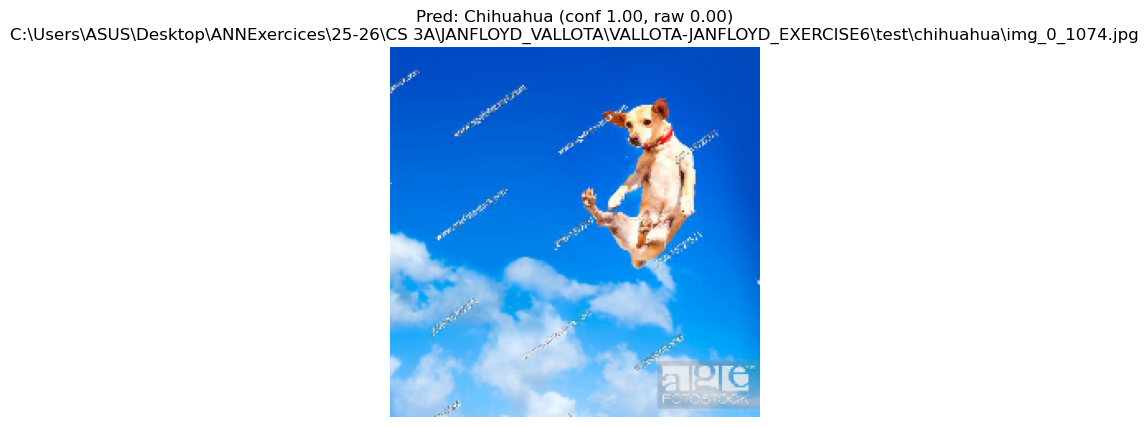

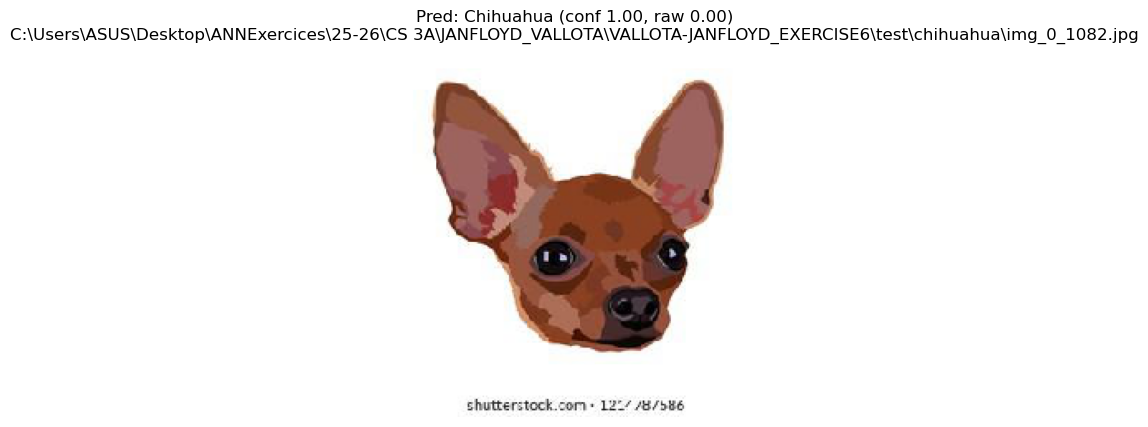

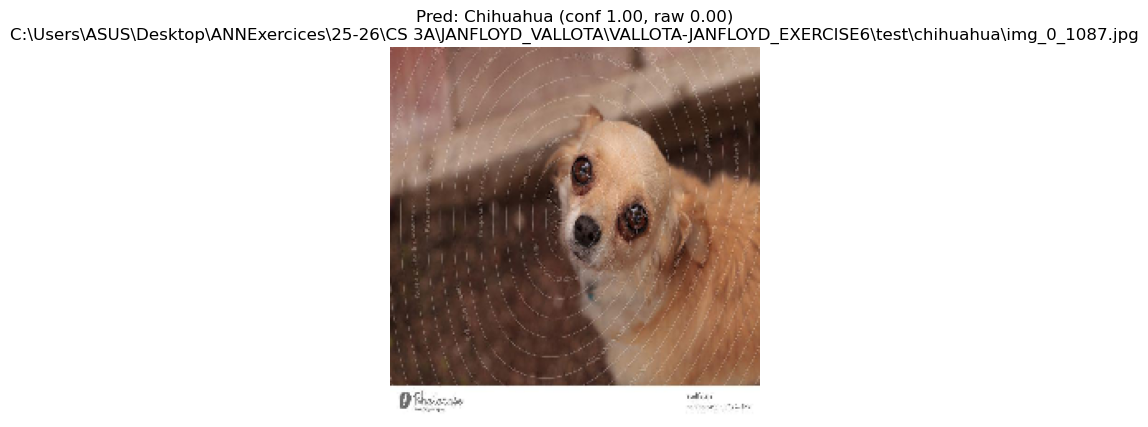

In [58]:
#Sample of images being classified
from tensorflow.keras.preprocessing import image

sample_paths = test_generator.filepaths[:4]
for p in sample_paths:
    img = image.load_img(p, target_size=IMG_SIZE)
    arr = image.img_to_array(img)
    arr_batch = tf.keras.applications.vgg16.preprocess_input(np.expand_dims(arr, axis=0))
    pred = float(model.predict(arr_batch)[0,0])
    label = "Muffin" if pred >= 0.5 else "Chihuahua"
    conf = pred if label == "Muffin" else 1.0 - pred  # confidence of predicted class
    plt.figure()
    plt.imshow(img)  # show raw image
    plt.title(f"Pred: {label} (conf {conf:.2f}, raw {pred:.2f})\n{p}")
    plt.axis('off')
plt.show()


In [59]:
# SIMPLE INFERENCE SCRIPT
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model_path=MODEL_PATH):
    model = tf.keras.models.load_model(model_path)
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)[0,0]
    label = "Muffin" if pred >= 0.5 else "Chihuahua"
    print(f"Prediction: {label} (confidence: {pred:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


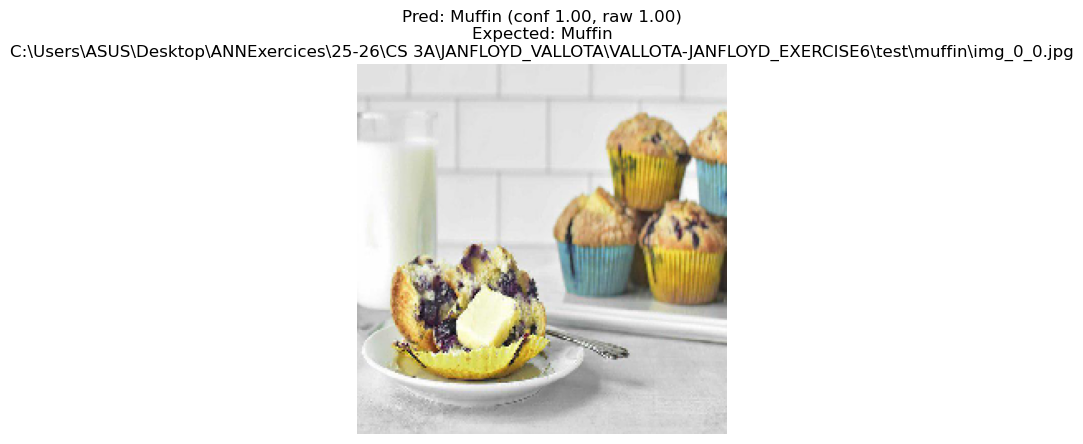

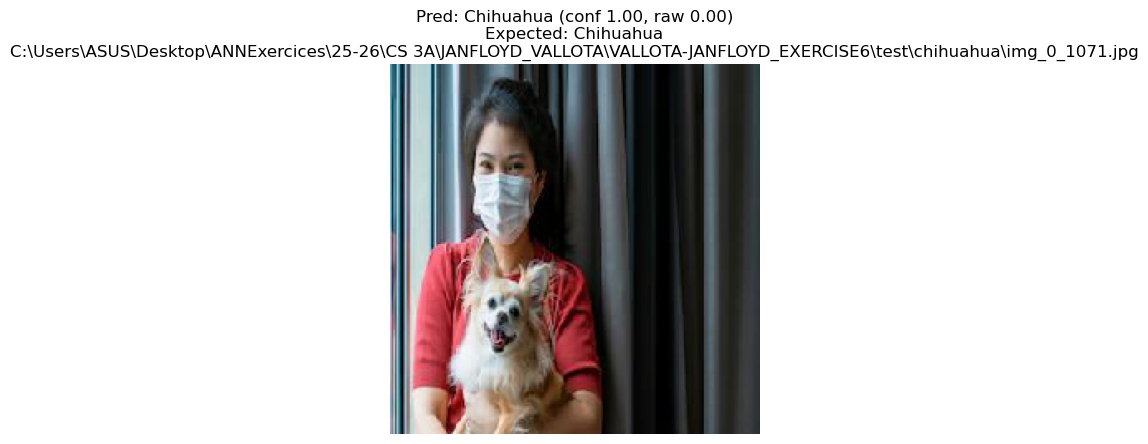

In [61]:
from pathlib import Path
from tensorflow.keras.preprocessing import image

def pick_example_from_test(class_name: str) -> str:
    class_dir = Path(test_dir) / class_name
    candidates = sorted(class_dir.glob("*.*"))
    if not candidates:
        raise FileNotFoundError(f"No images found in {class_dir}")
    return str(candidates[0])

samples = [
    ("Muffin", pick_example_from_test("muffin")),
    ("Chihuahua", pick_example_from_test("chihuahua")),
]

for expected_label, path in samples:
    img = image.load_img(path, target_size=IMG_SIZE)
    arr = image.img_to_array(img)
    arr_batch = tf.keras.applications.vgg16.preprocess_input(np.expand_dims(arr, axis=0))
    pred = float(model.predict(arr_batch)[0,0])
    pred_label = "Muffin" if pred >= 0.5 else "Chihuahua"
    conf = pred if pred_label == "Muffin" else 1.0 - pred
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {pred_label} (conf {conf:.2f}, raw {pred:.2f})\nExpected: {expected_label}\n{path}")
    plt.axis('off')
plt.show()